In [142]:
import pandas as pd
# from zipfile import ZipFile
import os
import re
# import json
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# import wordcloud
# from sklearn.preprocessing import OneHotEncoder
# import matplotlib.animation as animation
import nltk
from nltk.corpus import wordnet
from ast import literal_eval
from IPython.display import Image, display
from myfunctions import *
from statistics import mean
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
sns.set()

[nltk_data] Downloading package wordnet to /Users/aditya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [64]:
sleep = pd.read_csv('All Data/Raw Journey Data/Sleep_data_Until16May2020.csv')
sleep.rename(columns={'Unnamed: 0':'id'}, inplace=True)
sleep.drop(columns='logId',inplace=True)
sleep.set_index('id', inplace=True)
sleep.sort_values('date', inplace=True)
sleep

,date,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
id,,,,,,,,,,,,,,
19215335615,2018-08-17,2018-08-17T15:40:30.000,2018-08-17T16:41:30.000,3660000,0,57,4,0,61,93,classic,0,"{'summary': {'restless': {'count': 3, 'minutes...",False
19209201207,2018-08-17,2018-08-17T03:11:00.000,2018-08-17T08:57:19.000,20760000,10,333,3,0,346,99,classic,0,"{'summary': {'restless': {'count': 5, 'minutes...",True
19231419951,2018-08-18,2018-08-18T20:39:30.000,2018-08-18T22:23:30.000,6240000,0,94,10,0,104,90,classic,0,"{'summary': {'restless': {'count': 2, 'minutes...",True
19248814046,2018-08-20,2018-08-20T10:56:00.000,2018-08-20T13:31:30.000,9300000,0,143,12,0,155,92,classic,0,"{'summary': {'restless': {'count': 2, 'minutes...",True
19257277615,2018-08-21,2018-08-21T00:05:00.000,2018-08-21T07:31:00.000,26760000,0,442,4,0,446,99,classic,0,"{'summary': {'restless': {'count': 3, 'minutes...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27138332620,2020-05-12,2020-05-12T01:20:00.000,2020-05-12T08:23:30.000,25380000,0,406,17,0,423,96,classic,0,"{'summary': {'restless': {'count': 13, 'minute...",True
27154699444,2020-05-13,2020-05-13T01:11:30.000,2020-05-13T09:42:30.000,30660000,0,481,30,0,511,94,classic,0,"{'summary': {'restless': {'count': 17, 'minute...",True
27171441219,2020-05-14,2020-05-14T02:04:00.000,2020-05-14T08:58:30.000,24840000,0,381,33,0,414,92,classic,0,"{'summary': {'restless': {'count': 20, 'minute...",True


In [65]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf.head(2)

,text,date_modified,date_journal,address,lat,lon,posture,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1439198245820-3fda14add91e3f20,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises me hw u so effortlessl...,1,Philosophy It surprises me ... hw you so effor...


In [66]:
sleep.mainSleep.value_counts()

True     553
False    139
Name: mainSleep, dtype: int64

In [103]:
asleep_daily = sleep.groupby('date').agg({'minutesAsleep':sum})
asleep_daily

,minutesAsleep
date,
2018-08-17,390
2018-08-18,94
2018-08-20,143
2018-08-21,442
2018-08-28,335
...,...
2020-05-12,406
2020-05-13,481
2020-05-14,381


In [104]:
calories = pd.read_csv('All Data/Raw Journey Data/Calories_data_Until16May2020.csv')
calories.rename(columns={'Unnamed: 0':'date'}, inplace=True)
calories.set_index('date', inplace=True)
calories

,value
date,
2018-08-15,1454.40
2018-08-16,1509.64
2018-08-17,1996.21
2018-08-18,1853.85
2018-08-19,2054.30
...,...
2020-05-12,1934.81
2020-05-13,1467.95
2020-05-14,1900.42


In [105]:
# idx = pd.date_range(calories.index[0],calories.index[-1])

In [106]:
asleep_daily = asleep_daily.merge(calories, on='date',how='right')

In [107]:
asleep_daily.minutesAsleep.fillna(0.0,inplace=True)
asleep_daily.sort_values(by='date',inplace=True)
asleep_daily.reset_index(inplace=True)
asleep_daily

,date,minutesAsleep,value
0,2018-08-15,0.0,1454.40
1,2018-08-16,0.0,1509.64
2,2018-08-17,390.0,1996.21
3,2018-08-18,94.0,1853.85
4,2018-08-19,0.0,2054.30
...,...,...,...
636,2020-05-12,406.0,1934.81
637,2020-05-13,481.0,1467.95
638,2020-05-14,381.0,1900.42
639,2020-05-15,387.0,1986.37


In [108]:
for i in range(len(asleep_daily)):
    if asleep_daily.loc[i,'minutesAsleep']==0.0:
        try:
            asleep_daily.loc[i,'minutesAsleep'] = round(mean(asleep_daily.loc[i-1,'minutesAsleep'],asleep_daily.loc[i+1,'minutesAsleep'],1))
        except:
            asleep_daily.loc[i,'minutesAsleep'] = round(mean(asleep_daily.minutesAsleep),1)
            
            

In [109]:
asleep_daily

,date,minutesAsleep,value
0,2018-08-15,356.8,1454.40
1,2018-08-16,357.4,1509.64
2,2018-08-17,390.0,1996.21
3,2018-08-18,94.0,1853.85
4,2018-08-19,357.9,2054.30
...,...,...,...
636,2020-05-12,406.0,1934.81
637,2020-05-13,481.0,1467.95
638,2020-05-14,381.0,1900.42
639,2020-05-15,387.0,1986.37


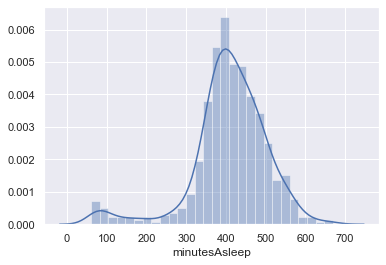

In [74]:
sns.distplot(asleep_daily.minutesAsleep)

In [186]:
def binner(nbins):
# nbins = 92
    bin_size = round(len(asleep_daily)/nbins)
    try:
        out = pd.cut(asleep_daily.index, bins=nbins, include_lowest=False,labels=asleep_daily.date[::bin_size]) #binning
    except:
        out = pd.cut(asleep_daily.index, bins=nbins, include_lowest=False,labels=asleep_daily.date[bin_size::bin_size].values)
    asleep_daily['bins']=out
# asleep_daily

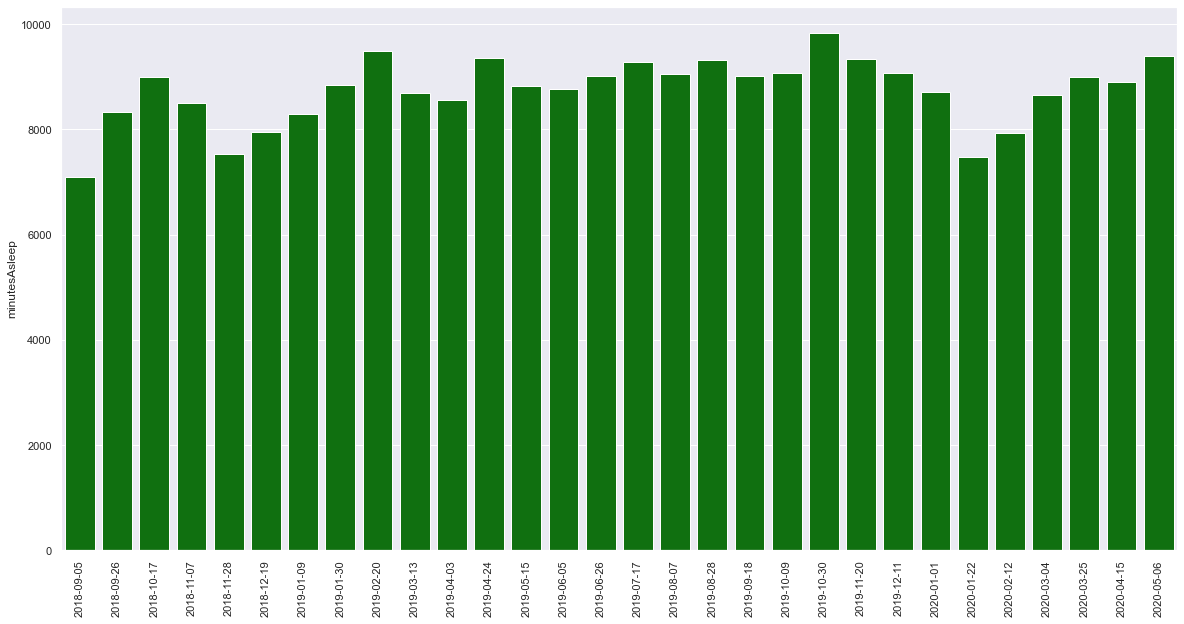

In [187]:
binner(30)
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(asleep_daily.bins.unique(), asleep_daily.groupby('bins').sum()['minutesAsleep'], ax=ax, color='green')

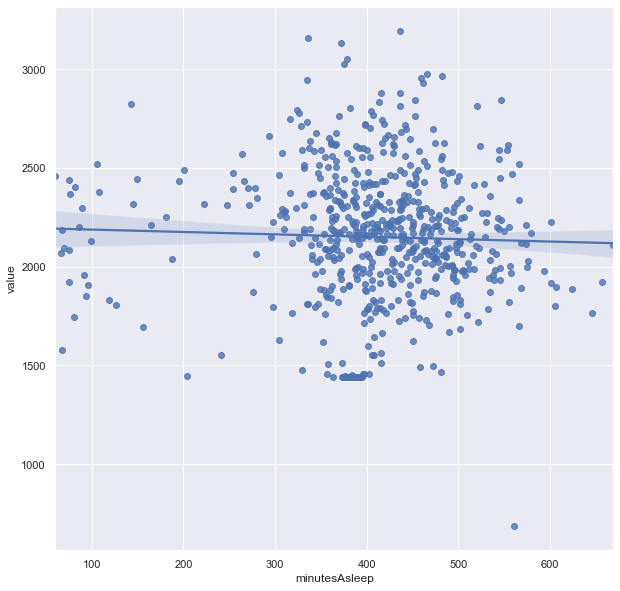

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(asleep_daily.minutesAsleep,asleep_daily.value, ax=ax)

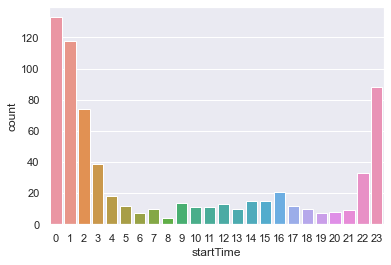

In [78]:
sns.countplot(pd.DatetimeIndex(sleep.startTime).hour)

In [79]:
sleep['slept_late'] = [int(each>1 & each<9) for each in pd.DatetimeIndex(sleep.startTime).hour]
sleep['restless_mins'] = [literal_eval(x)['summary']['restless']['minutes'] for x in sleep.levels]

In [226]:
try:
    asleep_daily.drop(columns=['minutesAwake','slept_late','restless_mins'], inplace=True)
except:
    pass
asleep_daily = asleep_daily.merge(sleep[sleep['mainSleep']==True][['slept_late','date']],on='date',how='left')
asleep_daily = asleep_daily.merge(sleep[sleep['mainSleep']==True].groupby('date').agg({'minutesAwake':'sum'}), on='date', how='left')
asleep_daily = asleep_daily.merge(sleep[sleep['mainSleep']==True][['restless_mins','date']],on='date',how='left')
asleep_daily

,date,minutesAsleep,value,bins,slept_late,minutesAwake,restless_mins
0,2018-08-15,356.8,1454.40,2018-08-25,NaN,NaN,NaN
1,2018-08-16,357.4,1509.64,2018-08-25,NaN,NaN,NaN
2,2018-08-17,390.0,1996.21,2018-08-25,1.0,3.0,11.0
3,2018-08-18,94.0,1853.85,2018-08-25,1.0,10.0,5.0
4,2018-08-19,357.9,2054.30,2018-08-25,NaN,NaN,NaN
...,...,...,...,...,...,...,...
636,2020-05-12,406.0,1934.81,2020-05-16,0.0,17.0,16.0
637,2020-05-13,481.0,1467.95,2020-05-16,0.0,30.0,26.0
638,2020-05-14,381.0,1900.42,2020-05-16,1.0,33.0,33.0
639,2020-05-15,387.0,1986.37,2020-05-16,1.0,44.0,44.0


In [237]:
asleep_daily.restless_mins.fillna(round(mean(asleep_daily.restless_mins.dropna())), inplace=True)

In [239]:
asleep_daily.sort_values(by='date',inplace=True)
asleep_daily.minutesAwake.fillna(0.0,inplace=True)

# asleep_daily.reset_index(inplace=True)
for i in range(len(asleep_daily)):
    if np.isnan(asleep_daily.loc[i,'slept_late']):
        try:
            asleep_daily.loc[i,'slept_late'] = asleep_daily.loc[i-1,'slept_late']
        except:
            asleep_daily.loc[i,'slept_late'] = 0
    if asleep_daily.loc[i,'minutesAwake']==0.0:
        try:
            asleep_daily.loc[i,'minutesAwake'] = round(mean(asleep_daily.loc[i-1,'minutesAwake'],asleep_daily.loc[i+1,'minutesAwake'],1))
        except:
            asleep_daily.loc[i,'minutesAwake'] = round(mean(asleep_daily.minutesAwake),1)
        
            
            

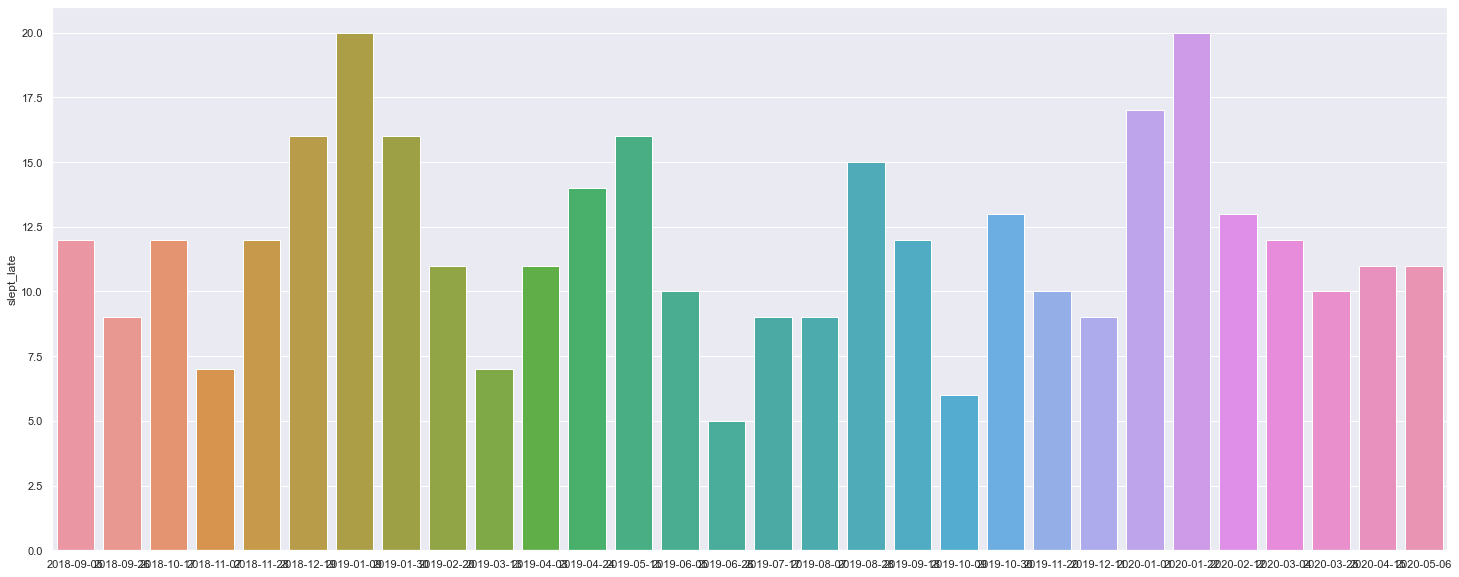

In [244]:
binner(30)
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(asleep_daily.bins.unique(),asleep_daily.groupby('bins').agg({'slept_late':'sum'})['slept_late'])

In [117]:
asleep_daily

,date,minutesAsleep,value,slept_late,minutesAwake,bins
0,2018-08-15,356.8,1454.40,0.0,26.2,2018-08-15
1,2018-08-16,357.4,1509.64,0.0,26.3,2018-08-15
2,2018-08-17,390.0,1996.21,1.0,3.0,2018-08-15
3,2018-08-18,94.0,1853.85,1.0,10.0,2018-08-15
4,2018-08-19,357.9,2054.30,1.0,26.3,2018-08-15
...,...,...,...,...,...,...
636,2020-05-12,406.0,1934.81,0.0,17.0,2020-04-08
637,2020-05-13,481.0,1467.95,0.0,30.0,2020-04-08
638,2020-05-14,381.0,1900.42,1.0,33.0,2020-04-08
639,2020-05-15,387.0,1986.37,1.0,44.0,2020-04-08


In [118]:
for i in range(len(asleep_daily)):
    if np.isnan(asleep_daily.loc[i,'minutesAwake']):
        try:
            asleep_daily.loc[i,'minutesAwake'] = round(mean(asleep_daily.loc[i-1,'minutesAwake'],asleep_daily.loc[i+1,'minutesAwake'],1))
        except:
            asleep_daily.loc[i,'minutesAwake'] = round(mean(asleep_daily.minutesAwake),1)
asleep_daily

,date,minutesAsleep,value,slept_late,minutesAwake,bins
0,2018-08-15,356.8,1454.40,0.0,26.2,2018-08-15
1,2018-08-16,357.4,1509.64,0.0,26.3,2018-08-15
2,2018-08-17,390.0,1996.21,1.0,3.0,2018-08-15
3,2018-08-18,94.0,1853.85,1.0,10.0,2018-08-15
4,2018-08-19,357.9,2054.30,1.0,26.3,2018-08-15
...,...,...,...,...,...,...
636,2020-05-12,406.0,1934.81,0.0,17.0,2020-04-08
637,2020-05-13,481.0,1467.95,0.0,30.0,2020-04-08
638,2020-05-14,381.0,1900.42,1.0,33.0,2020-04-08
639,2020-05-15,387.0,1986.37,1.0,44.0,2020-04-08


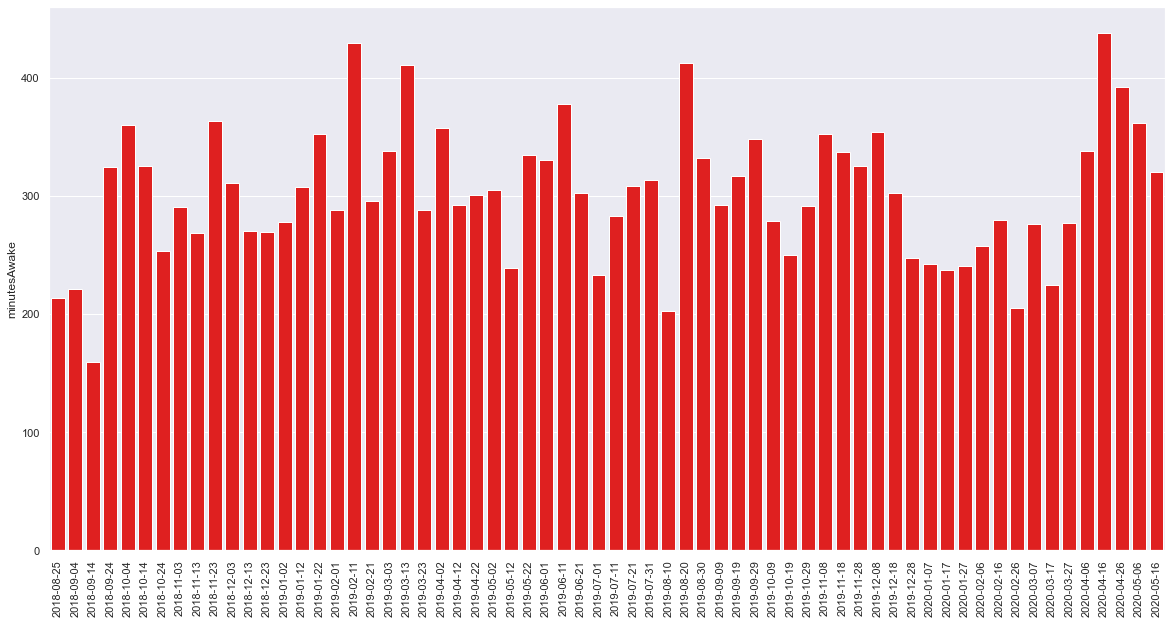

In [192]:
binner(64) #not all numbers will work here
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(asleep_daily.bins.unique(), asleep_daily.groupby('bins').sum()['minutesAwake'], ax=ax, color='red')

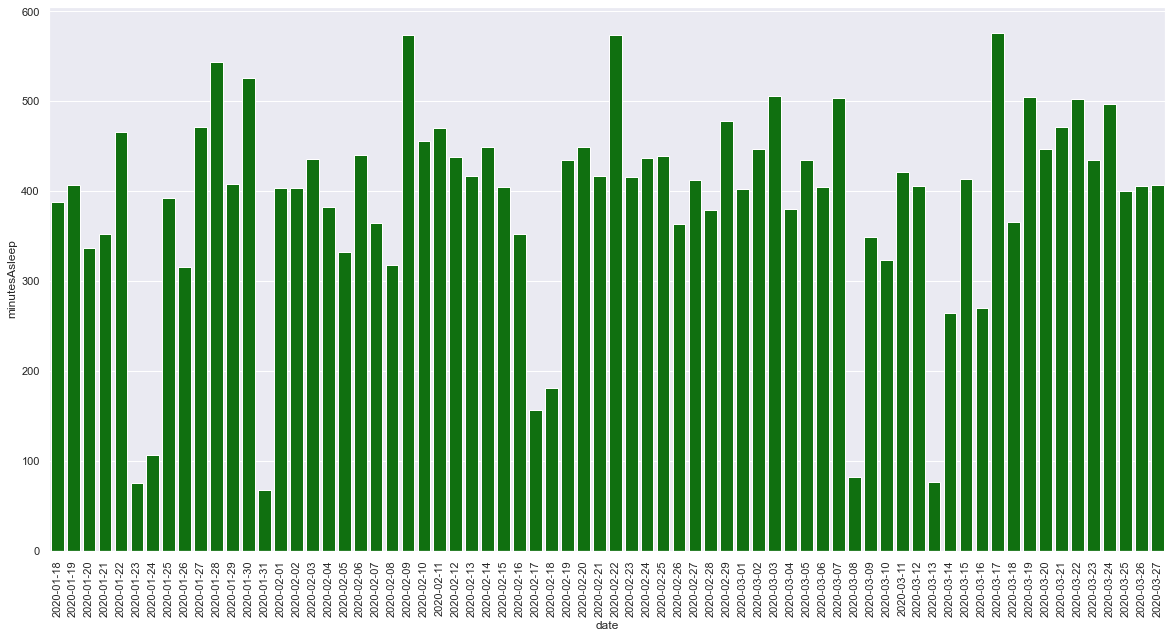

In [200]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(asleep_daily[-120:-50].date, asleep_daily[-120:-50]['minutesAsleep'], color='green')

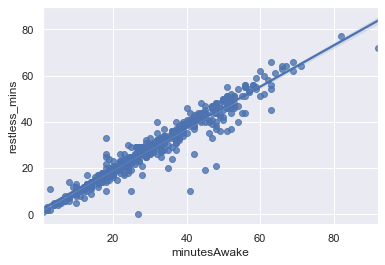

In [243]:
sns.regplot(asleep_daily.minutesAwake, asleep_daily.restless_mins)